In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych

In [2]:
stroke_df = pd.read_csv('stroke_data.csv')
stroke_df.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [3]:
# Podział kolumn na numeryczne i binarne
stroke_binary_features = [col for col in stroke_df if np.isin(stroke_df[col].dropna().unique(), [0, 1]).all()]
stroke_numerical_features = list(stroke_df.drop(stroke_binary_features, axis=1).columns)

In [4]:
stroke_binary_features

['sex',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'smoking_status',
 'stroke']

In [5]:
stroke_numerical_features

['age', 'work_type', 'avg_glucose_level', 'bmi']

# Podstawowe informacje

In [6]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [7]:
stroke_df.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555162,51.327255,0.213835,0.127719,0.821340,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,0.496954,21.623969,0.410017,0.333781,0.383072,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


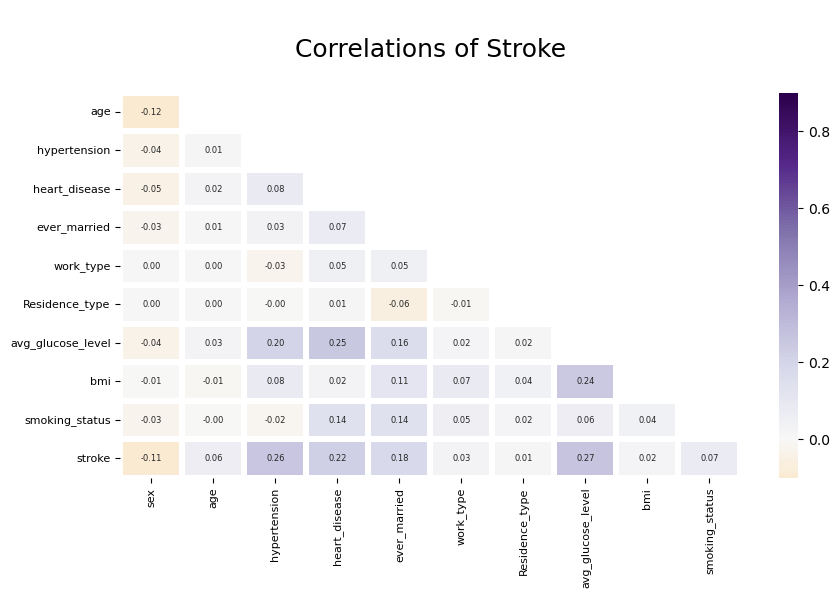

In [8]:
# Macierz korelacji
fig, ax = plt.subplots(figsize=(10,5))   

mask = np.triu(np.ones_like(stroke_df.corr(numeric_only = True), dtype=bool))[1:, :-1]
corr = stroke_df.corr(numeric_only = True).iloc[1:,:-1].copy()

ax = sns.heatmap(corr, mask=mask, vmin=-.1, vmax=.9, center=0, annot=True, fmt='.2f', 
               cmap ='PuOr', linewidths=4, annot_kws={"fontsize":6})

ax.set_title('\nCorrelations of Stroke\n', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
plt.show()

# Fiolet - wartości dodatnie, Biały - zero, Pomarańcz - wartości ujemne

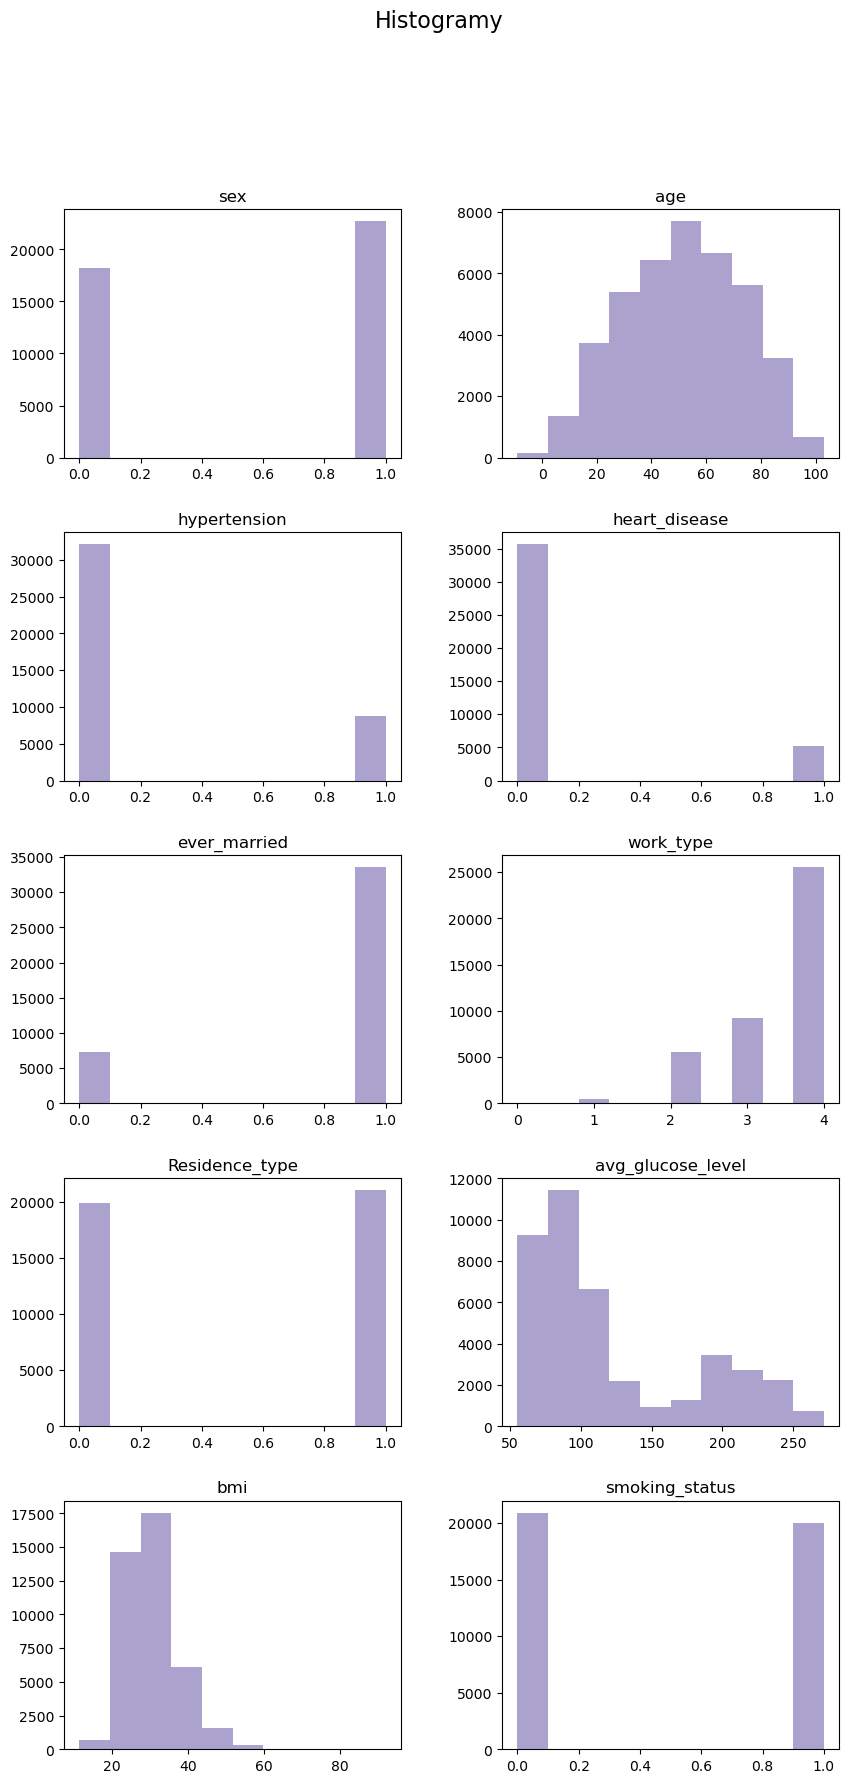

In [9]:
# Rozkład wszystkich cech
fig2, axis2 = plt.subplots(5, 2, figsize=(10,20))
fig2.suptitle('Histogramy', fontsize=16)
stroke_df.drop('stroke', axis=1).hist(grid = False, ax = axis2, color = '#aba3cd')
plt.show()

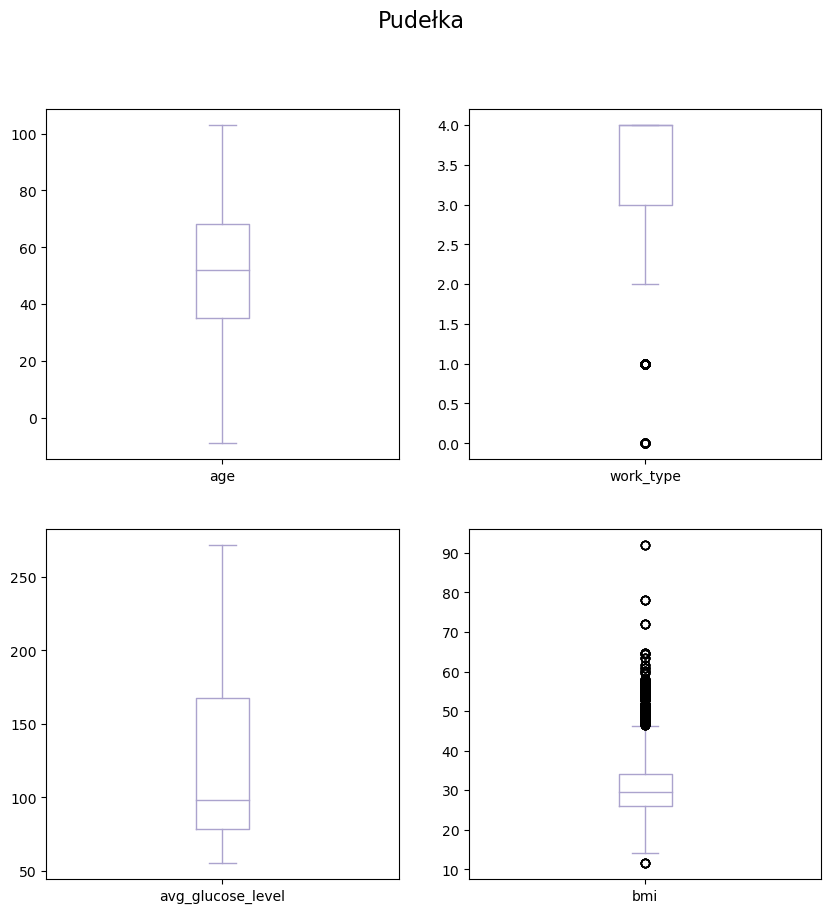

In [11]:
# Boxploty dla cech numerycznych
fig1, axis1 = plt.subplots(2, 2, figsize=(10,10))
fig1.suptitle('Pudełka', fontsize=16)
for ax, column in enumerate(stroke_df[stroke_numerical_features]):
    stroke_df[stroke_numerical_features].boxplot(column = column, grid = False, color = '#aba3cd', ax=axis1.ravel()[ax])
plt.show()

# Usunięcie wartości odstających